In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('INDIA VIX_minute.csv')
df.head()

,date,open,high,low,close,volume
0,2015-01-09 09:15:00,16.47,16.47,14.46,15.39,0
1,2015-01-09 09:16:00,15.39,15.47,15.33,15.45,0
2,2015-01-09 09:17:00,15.45,15.51,15.41,15.46,0
3,2015-01-09 09:18:00,15.46,15.50,15.33,15.40,0
4,2015-01-09 09:19:00,15.39,15.40,15.29,15.35,0


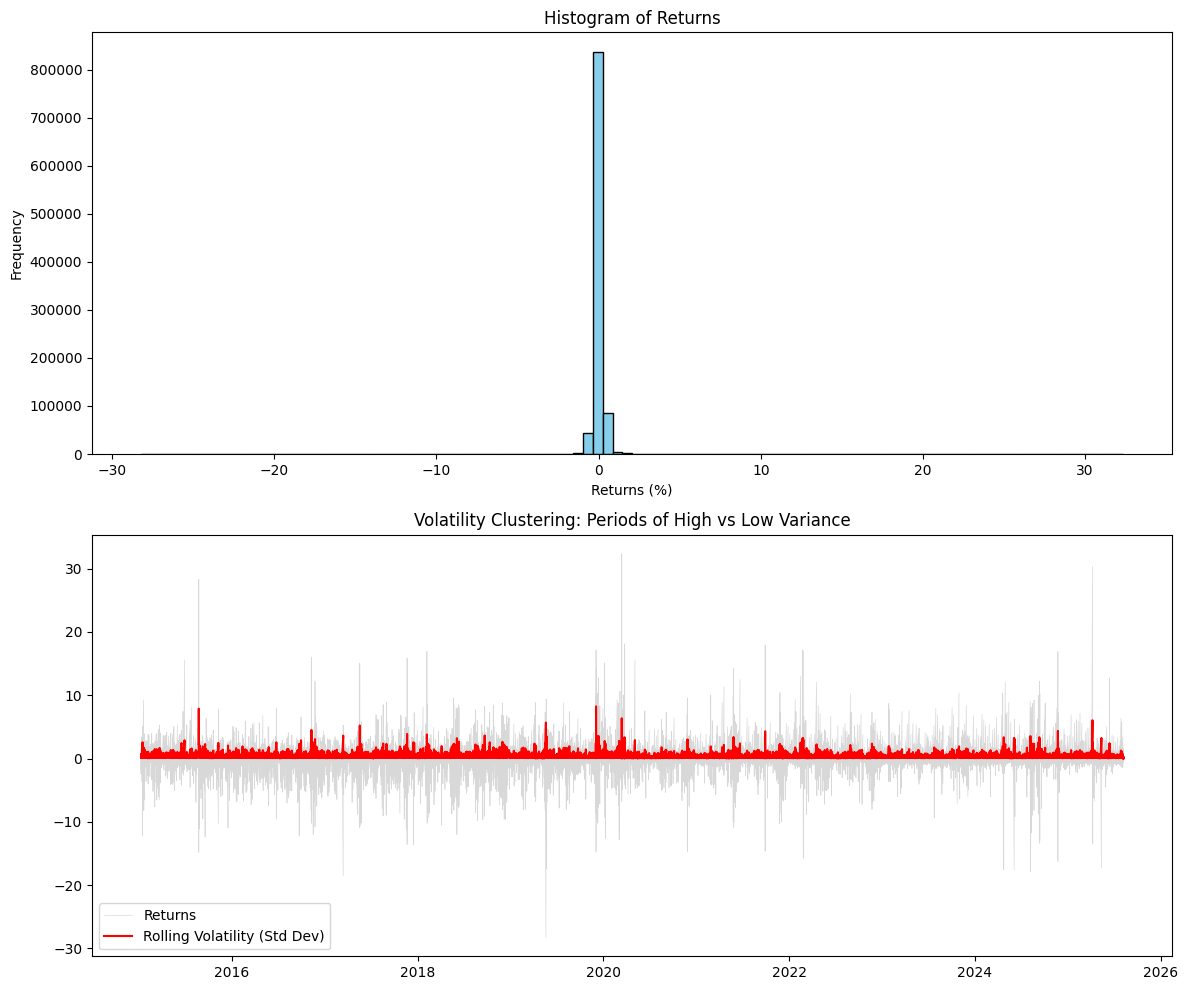

In [11]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df['returns'] = df['close'].pct_change()*100
df['rolling_volatility'] = df['returns'].rolling(window=30).std()

# --- Plot 1: Histogram of Returns ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.hist(df['returns'].dropna(), bins=100, color='skyblue', edgecolor='black')
ax1.set_title('Histogram of Returns')
ax1.set_xlabel('Returns (%)')
ax1.set_ylabel('Frequency')

# --- Plot 2: Volatility Clustering ---
ax2.plot(df.index, df['returns'], label='Returns', color='gray', alpha=0.3, linewidth=0.5)
ax2.plot(df.index, df['rolling_volatility'], label='Rolling Volatility (Std Dev)', color='red', linewidth=1.5)

ax2.set_title('Volatility Clustering: Periods of High vs Low Variance')
ax2.legend()

plt.tight_layout()
plt.show()